
*   Nama : Dimas Wisnu Saputro
*   Email : dimaswisnu250@gmail.com
*   Kota : Bandung


# Sumbission Dicoding | Proyek akhir | Klasifikasi Gambar

**1.   Langkah pertama mengimport library dan menyiapkan data set**

In [1]:
import tensorflow as tf #Memanggil libary tensor flow
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Menghasilkan kumpulan data gambar tensor dengan augmentasi data dalam real-time.
from tensorflow.keras.optimizers import RMSprop #Memanggil Algoritma RMSprop untuk pengoptimalan
from sklearn.model_selection import train_test_split #Memecah data training dan data testing
import zipfile #Mengkompres dan mengekstrak file zip pada python
import os #Library yang menyediakan fungsi untuk berinteraksi dengan sistem operasi
import shutil #Memanggil modoule Shell Utilities untuk melaksanakan operasi file dan direktori yang berbeda

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-05-31 06:01:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.01MB/s    in 4m 19s  

2021-05-31 06:05:57 (1.19 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**2.   Mengekstrak dataset dan disimpan pada '/tmp/'**


In [3]:
#Membaca file 'rockpaperscissors.zip' dan menyimpan nya di variabel zip_ref
with zipfile.ZipFile("/tmp/rockpaperscissors.zip","r") as zip_ref: 
    zip_ref.extractall("/tmp/")

**3. Membuat class Callback untuk menghentikan training setelah akurasi terpenuhi dan mencegah overfitting**

In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi di atas 96%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

**4.   Membuat direktori dan split dataset**

In [5]:
base_directory = '/tmp/rockpaperscissors' #Mengisi variabel base_diretory dengan direktori '/tmp/rockpaperscissors'
train_directory = os.path.join(base_directory,'train') #Mengisi variabel train_directory dengan direktori '/tmp/rockpaperscissors/train'
validation_directory = os.path.join(base_directory, 'val') #Mengisi variabel validation_directory dengan direktori '/tmp/rockpaperscissors/val'
roc_directory = os.path.join(base_directory,'rock') #Mengisi variabel roc_directory dengan direktori '/tmp/rockpaperscissors/rock'
pap_directory = os.path.join(base_directory, 'paper') #Mengisi variabel pap_directory dengan direktori '/tmp/rockpaperscissors/paper'
sci_directory = os.path.join(base_directory, 'scissors') #Mengisi variabel sci_directory  dengan direktori '/tmp/rockpaperscissors/scissors'
#os.path.join berfungsi menggabungkan satu atau lebih path. Nilai yang dikembalikan adalah rangkaian jalur dan setiap anggota * jalur dengan tepat satu pemisah direktori mengikuti setiap bagian yang tidak kosong kecuali bagian terakhir, yang berarti bahwa hasil hanya akan diakhiri dengan pemisah jika bagian terakhir kosong. Jika sebuah komponen adalah jalur absolut, semua komponen sebelumnya akan dibuang dan penggabungan dilanjutkan dari komponen jalur absolut.

In [6]:
#Memeriksa apakah direktori yang akan dibuat sudah ada
os.mkdir(train_directory) #os.mkdir() method di Python digunakan untuk membuat direktori bernama path dengan mode numerik yang ditentukan. Method ini memunculkan FileExistsError jika direktori yang akan dibuat sudah ada.
os.mkdir(validation_directory) #os.mkdir() method di Python digunakan untuk membuat direktori bernama path dengan mode numerik yang ditentukan.

In [7]:
train_roc = os.path.join(train_directory, 'rock') #Mengisi variabel train_roc dengan direktori '/tmp/rockpaperscissors/train/rock'
train_pap = os.path.join(train_directory, 'paper') #Mengisi variabel train_pap dengan direktori '/tmp/rockpaperscissors/train/paper'
train_sci = os.path.join(train_directory, 'scissors') #Mengisi variabel train_roc dengan direktori '/tmp/rockpaperscissors/train/scissors'
val_roc = os.path.join(validation_directory, 'rock') #Mengisi variabel val_roc dengan direktori '/tmp/rockpaperscissors/val/rock'
val_pap = os.path.join(validation_directory, 'paper') #Mengisi variabel val_pap dengan direktori '/tmp/rockpaperscissors/val/paper'
val_sci = os.path.join(validation_directory, 'scissors') #Mengisi variabel val_sci dengan direktori '/tmp/rockpaperscissors/val/scissors'

In [8]:
#Memeriksa apakah direktori yang akan dibuat sudah ada
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)
#os.mkdir() method di Python digunakan untuk membuat direktori bernama path dengan mode numerik yang ditentukan. 
#Method ini memunculkan FileExistsError jika direktori yang akan dibuat sudah ada.

**5. Mengevaluasi performa model machine learning menggunakan Train & Test split**

In [9]:
#Memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_directory), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_directory), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_directory), test_size = 0.40)

"""
Method Python listdir () mengembalikan daftar yang berisi nama-nama entri dalam direktori yang diberikan oleh jalur. 
Daftar ini dalam urutan yang sewenang-wenang. Ini tidak termasuk entri khusus '.' dan '..' bahkan jika mereka ada di direktori.

train_test_split adalah fungsi dalam pemilihan model Sklearn untuk membagi larik data menjadi dua subset: 
untuk data pelatihan dan untuk data pengujian. Dengan fungsi ini, tidak perlu membagi dataset secara manual.
Secara default, Sklearn train_test_split akan membuat partisi acak untuk dua subset.
"""

"\nMethod Python listdir () mengembalikan daftar yang berisi nama-nama entri dalam direktori yang diberikan oleh jalur. \nDaftar ini dalam urutan yang sewenang-wenang. Ini tidak termasuk entri khusus '.' dan '..' bahkan jika mereka ada di direktori.\n\ntrain_test_split adalah fungsi dalam pemilihan model Sklearn untuk membagi larik data menjadi dua subset: \nuntuk data pelatihan dan untuk data pengujian. Dengan fungsi ini, tidak perlu membagi dataset secara manual.\nSecara default, Sklearn train_test_split akan membuat partisi acak untuk dua subset.\n"

In [10]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_directory, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_directory,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_directory,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_directory, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_directory,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_directory,file), os.path.join(val_sci,file))

#Method shutil.copy(source,destination) digunakan untuk menyalin konten file sumber ke file atau direktori tujuan.

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

"""
Cara kerja imageDataGenerator()
-Menerima sekumpulan gambar yang digunakan untuk pelatihan.
-Mengambil kelompok ini dan menerapkan serangkaian transformasi acak ke setiap gambar dalam kelompok (termasuk rotasi acak, pengubahan ukuran, pemotongan, dll.).
-Mengganti kelompok awal dengan kelompok baru yang diubah secara acak.
-Pelatihan CNN pada batch yang diubah secara acak ini (yaitu, data asli itu sendiri tidak digunakan untuk pelatihan).
"""

'\nCara kerja imageDataGenerator()\n-Menerima sekumpulan gambar yang digunakan untuk pelatihan.\n-Mengambil kelompok ini dan menerapkan serangkaian transformasi acak ke setiap gambar dalam kelompok (termasuk rotasi acak, pengubahan ukuran, pemotongan, dll.).\n-Mengganti kelompok awal dengan kelompok baru yang diubah secara acak.\n-Pelatihan CNN pada batch yang diubah secara acak ini (yaitu, data asli itu sendiri tidak digunakan untuk pelatihan).\n'

In [12]:
#flow_from_directory berfungsi untuk Mengambil jalur ke direktori & menghasilkan kumpulan data yang ditambah

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
#Sequential mengelompokkan tumpukan linier dari lapisan ke dalam tf.keras.Model
model.summary() #Menampilkan kesimpulan model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)
#Untuk memulai proses training digunakan fungsi fit()

Epoch 1/20
41/41 - 79s - loss: 1.1947 - accuracy: 0.4535 - val_loss: 0.8454 - val_accuracy: 0.6007
Epoch 2/20
41/41 - 78s - loss: 0.5702 - accuracy: 0.7835 - val_loss: 0.3951 - val_accuracy: 0.8611
Epoch 3/20
41/41 - 78s - loss: 0.3274 - accuracy: 0.8773 - val_loss: 0.4272 - val_accuracy: 0.8565
Epoch 4/20
41/41 - 77s - loss: 0.2306 - accuracy: 0.9192 - val_loss: 0.2465 - val_accuracy: 0.9086
Epoch 5/20
41/41 - 77s - loss: 0.1920 - accuracy: 0.9360 - val_loss: 0.2287 - val_accuracy: 0.9248
Epoch 6/20
41/41 - 77s - loss: 0.1573 - accuracy: 0.9405 - val_loss: 0.2230 - val_accuracy: 0.9282
Epoch 7/20
41/41 - 77s - loss: 0.1550 - accuracy: 0.9505 - val_loss: 0.2291 - val_accuracy: 0.9259
Epoch 8/20
41/41 - 78s - loss: 0.1424 - accuracy: 0.9550 - val_loss: 0.1577 - val_accuracy: 0.9468
Epoch 9/20
41/41 - 77s - loss: 0.1164 - accuracy: 0.9566 - val_loss: 0.1765 - val_accuracy: 0.9549
Epoch 10/20
41/41 - 77s - loss: 0.1111 - accuracy: 0.9619 - val_loss: 0.2650 - val_accuracy: 0.8993

Akurasi 

# Visualisasi loss train & validation

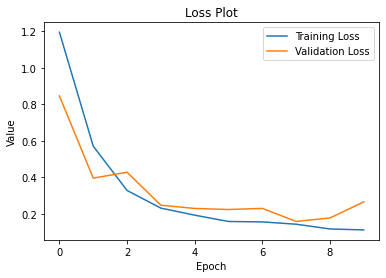

In [15]:
from matplotlib import pyplot as plt #Memanggil pyplot dari library matplotlib untuk membuat grafik plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

#Visualisasi accuracy train & validation

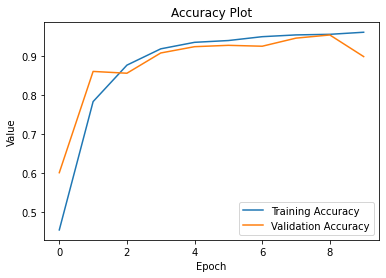

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

#Main Driver

Saving Batu.png to Batu.png
Batu.png
rock


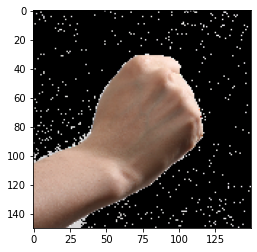

In [18]:
import numpy as np #Library untuk kebutuhan matematika
from google.colab import files #Meminta file
from keras.preprocessing import image #Memproses gambar
import matplotlib.pyplot as plt #Menampilkan grafik plot
import matplotlib.image as mpimg #Menampilkan gambar
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')